# Advanced Course in Machine Learning
## Exercise Session 4


<span style="color:blue">**Sanaz Jamalzadeh**</span>

## 1. Mixture models (programming exercise)

In [1]:
from scipy.stats import norm
import numpy as np

In [2]:
def logprob(x, mu, sig, pi):
    return norm.logpdf(x, loc=mu, scale=sig)[0] + np.log(pi)

# Use default values in exercise
clusts = [(0., np.sqrt(0.01), 0.5), (1.13, np.sqrt(0.006), 0.5)]

# log-probability for x = 5
logp = np.array([logprob([5], mu, sig, pi) for mu, sig, pi in clusts])


# log sum exp trick
def convert_prob(value):
    max_val = np.max(value)
    val = np.exp(value - max_val)
    return val / sum(val)


r = convert_prob(logp)

print('responsibilities = ', r)

responsibilities =  [0.10152327 0.89847673]


The problem is that p(x|y = c) is often a very small number, especially if x is a high-dimensional vector. This is because we require that x p(x|y) = 1, so the probability of observing any particular high-dimensional vector is
small. The obvious solution is to take logs using log-sum-exp thrick here when we have large D values. For instance, in case of identical matrix (I) as covariance matrix, the mean likelihood value would be around −1.42D. So, if we would have large D values, the log likelihood would still be similar to small values that we obtained here. (refer to book)

## 2. Matrix factorization (programming exercise)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import seaborn as sns

In [4]:
#Function iteration
# Input : solved vectors, fixed vectors, data, weight and K
# Output : the solved vectors

def iteration(solved, fixed, data, weight, K):
    A = np.dot(fixed, fixed.T) + np.eye(K) * weight
    B = np.dot(data, fixed.T)
    A_inv = np.linalg.inv(A)
    solved = B.dot(A_inv).T
    return solved

# Function prediction
# Input : the columns of u and v
# Output : the prediction of u and v
def prediction(u, v):
    predict = np.dot(u.T, v)
    return predict

In [5]:
# calculate mean squared error
# Input : real_value and pred_value
# Output : the mean squared error of the inputs

def MSE(real_value, pred_value):
    mask = np.nonzero(real_value)
    error = mean_squared_error(real_value[mask], pred_value[mask])
    return error

In [6]:
# Function matrix_factorization
# Input : train set, test set, lambdas, k and number of iterations
# Output : the vectors u, v and the errors

def matrix_factorization(train, test, u_lambda, v_lambda, K, iterations):
    u = np.random.rand(K, 375)
    v = np.random.rand(K, 500)
    test_errors  = []
    train_errors = []

    for x in range(iterations):

        u = iteration(u, v, train, u_lambda, K)
        v = iteration(v, u, train.T, v_lambda, K)

        predictions = prediction(u, v)
        test_error = MSE(test, predictions)
        train_error = MSE(train, predictions)
        test_errors.append(test_error)
        train_errors.append(train_error)

    return u, v, test_errors, train_errors, test_error, train_error

In [7]:
# Function traintest
# Input : data and p
# Output : the train and test
def train_test(data, p):
    train = np.random.rand(375, 500)
    test = data.copy()
    for d in range(test.shape[0]):
        for n in range(test.shape[1]):
            if train[d,n] <= p:
                train[d,n] = test[d,n]
                test[d,n] = 0
            else:
                train[d,n] = 0

    assert np.all(train*test == 0)
    return train, test

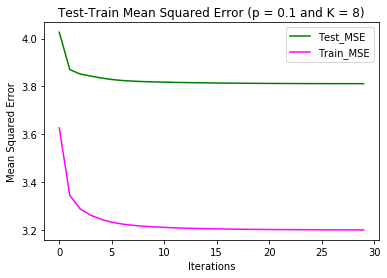

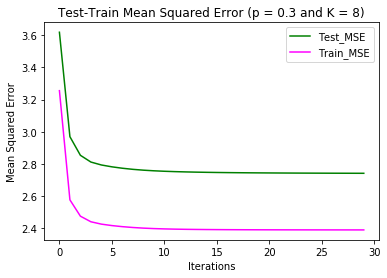

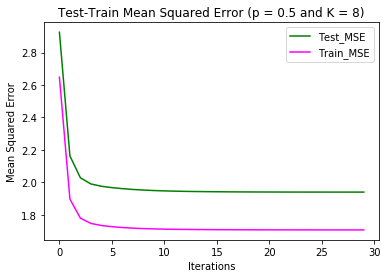

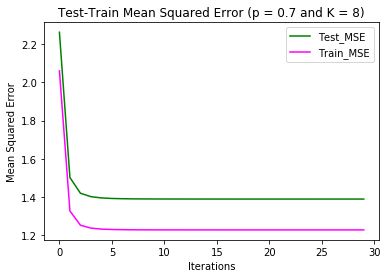

In [8]:
# Now we apply the algorithm in the given data.csv
data = pd.read_csv("problem2data.csv", header=None)

# Set the parameters
u_lambda = 0.01
v_lambda = 0.01
K = 8
p_range = [0.1, 0.3, 0.5, 0.7]
test_error_p = []
train_error_p = []

for p in p_range:
    train, test = train_test(data.values, p)
    u, v, test_errors, train_errors, test_error, train_error = matrix_factorization(train, test, u_lambda, v_lambda, K, 30)
    test_error_p.append(test_error)
    train_error_p.append(train_error)
    plt.plot(test_errors,  label = "Test_MSE" , c = 'green')
    plt.plot(train_errors, label = "Train_MSE" , c = 'magenta')
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title('Test-Train Mean Squared Error (p = {} and K = 8)'.format(p))
    plt.legend()
    plt.show()

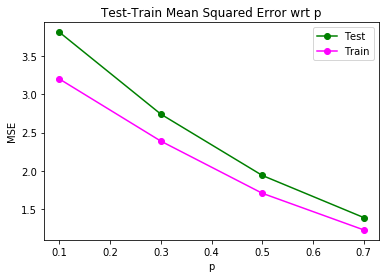

In [9]:
# Plot 2D for the values of P
# I would use the higher values of p since they make the error smaller
plt.plot(p_range, test_error_p, label = 'Test', linestyle='-', marker='o', c= 'green')
plt.plot(p_range, train_error_p, label = 'Train', linestyle='-', marker='o', c = 'magenta')
plt.xlabel('p')
plt.ylabel('MSE')
plt.title('Test-Train Mean Squared Error wrt p')
plt.legend()
plt.show()

### Try different values of K for p =0.1

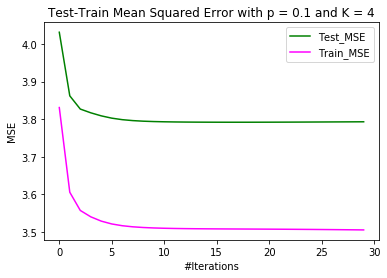

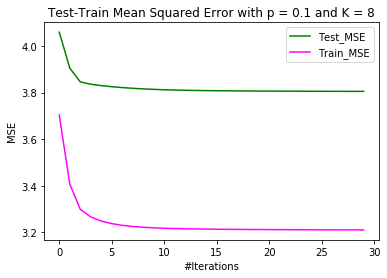

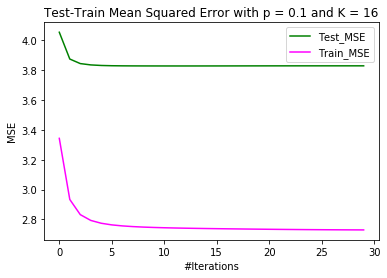

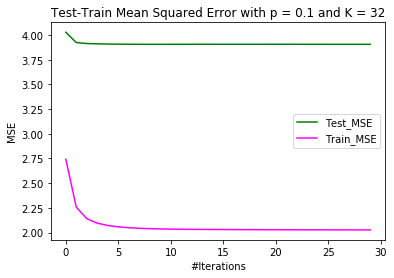

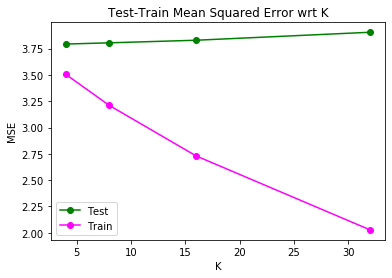

In [10]:
p = 0.1
train, test = train_test(data.values, p)
K_range = [4, 8, 16, 32]
test_error_K = []
train_error_K = []

for K in K_range:
    u, v, test_errors, train_errors, test_error, train_error = matrix_factorization(train, test, u_lambda, v_lambda, K, 30)
    test_error_K.append(test_error)
    train_error_K.append(train_error)
    plt.plot(test_errors, label = "Test_MSE" , c = 'green')
    plt.plot(train_errors,  label = "Train_MSE" , c = 'magenta')
    plt.xlabel('#Iterations')
    plt.ylabel('MSE')
    plt.title('Test-Train Mean Squared Error with p = 0.1 and K = {}'.format(K))
    plt.legend()
    plt.show()

# Plot 2D of the values of K
# I would use the smallest value of K since the error is smaller
plt.plot(K_range, test_error_K, label = 'Test', linestyle='-', marker='o', c = 'green')
plt.plot(K_range, train_error_K, label = 'Train', linestyle='-', marker='o', c = 'magenta')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('Test-Train Mean Squared Error wrt K')
plt.legend()
plt.show()

#### K=8 is almost a nice choice as it gives lower MSE in train and test as shown in plot. 

### Try different regularization parameters of K=8 and p =0.1

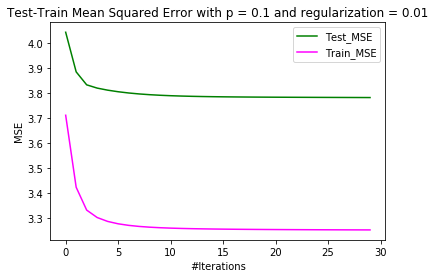

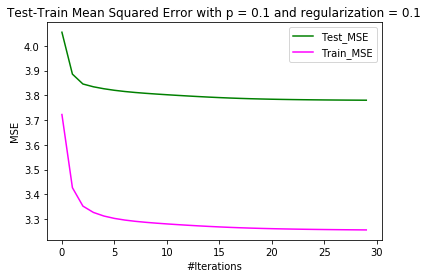

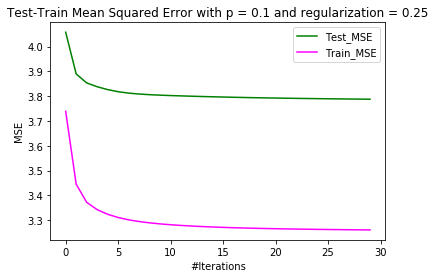

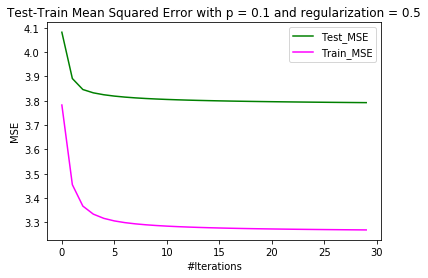

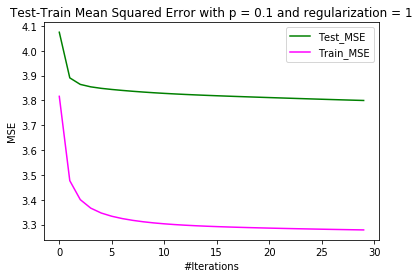

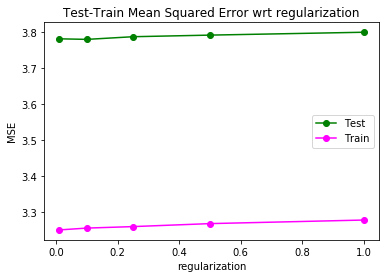

In [11]:
p = 0.1
train, test = train_test(data.values, p)
u_range = [0.01, 0.1, 0.25, 0.5, 1]  # set same u and v regularization parameters

K = 8
test_error_u = []
train_error_u = []

for u_lambda in u_range:
    u, v, test_errors, train_errors, test_error, train_error = matrix_factorization(train, test, u_lambda, u_lambda, K, 30)
    test_error_u.append(test_error)
    train_error_u.append(train_error)
    plt.plot(test_errors, label = "Test_MSE" , c = 'green')
    plt.plot(train_errors,  label = "Train_MSE" , c = 'magenta')
    plt.xlabel('#Iterations')
    plt.ylabel('MSE')
    plt.title('Test-Train Mean Squared Error with p = 0.1 and regularization = {}'.format(u_lambda))
    plt.legend()
    plt.show()

# Plot 2D of the values of K
# I would use the smallest value of K since the error is smaller
plt.plot(u_range, test_error_u, label = 'Test', linestyle='-', marker='o', c = 'green')
plt.plot(u_range, train_error_u, label = 'Train', linestyle='-', marker='o', c = 'magenta')
plt.xlabel('regularization')
plt.ylabel('MSE')
plt.title('Test-Train Mean Squared Error wrt regularization')
plt.legend()
plt.show()

 #### Use different combinations of parameters for K and regularizations to find the best set. We set $\lambda_{u}$ and $\lambda_{v}$ equal here.

In [14]:
p = 0.1

# use different parameters for K and regularization to find the best set

K_set = [2, 4, 6, 8, 10]
regular_set = [0.01, 0.1, 0.5, 1, 10]

losses = np.empty((0, 4), float)


for K in K_set:
    for reg in regular_set:
        print("K equals", K, "and regularization equals", reg)
        # test different iterations!
        
        u, v, test_errors, train_errors, test_error, train_error = matrix_factorization(train, test, u_lambda, u_lambda, K, 30)
        losses = np.vstack((losses, [K, reg, test_errors[-1], train_errors[-1]]))
        

best = np.argmin(losses[:,3])
print("best loss for test set", losses[best,3], "with K equals", losses[best,0], "and regularization equals", losses[best,1])


K equals 2 and regularization equals 0.01
K equals 2 and regularization equals 0.1
K equals 2 and regularization equals 0.5
K equals 2 and regularization equals 1
K equals 2 and regularization equals 10
K equals 4 and regularization equals 0.01
K equals 4 and regularization equals 0.1
K equals 4 and regularization equals 0.5
K equals 4 and regularization equals 1
K equals 4 and regularization equals 10
K equals 6 and regularization equals 0.01
K equals 6 and regularization equals 0.1
K equals 6 and regularization equals 0.5
K equals 6 and regularization equals 1
K equals 6 and regularization equals 10
K equals 8 and regularization equals 0.01
K equals 8 and regularization equals 0.1
K equals 8 and regularization equals 0.5
K equals 8 and regularization equals 1
K equals 8 and regularization equals 10
K equals 10 and regularization equals 0.01
K equals 10 and regularization equals 0.1
K equals 10 and regularization equals 0.5
K equals 10 and regularization equals 1
K equals 10 and regul

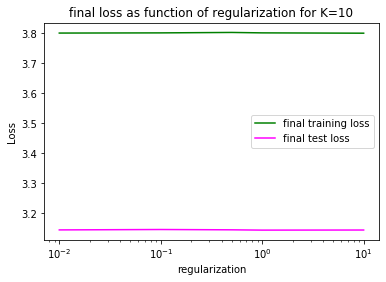

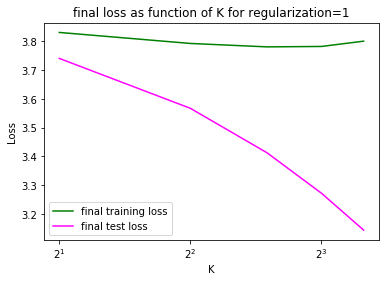

In [15]:
# plot for best K (here 10 is the best)
val = losses[losses[:,0] == 10, :]
plt.plot(regular_set, val[:,2], label="final training loss", c ='green')
plt.plot(regular_set, val[:,3], label="final test loss", c = 'magenta')
plt.title("final loss as function of regularization for K=10")
plt.ylabel("Loss")
plt.xlabel("regularization")
plt.xscale('log')
plt.legend()

plt.show()

val = losses[losses[:,1] == 1, :]
plt.plot(K_set, val[:,2], label="final training loss", c ='green')
plt.plot(K_set, val[:,3], label="final test loss", c = 'magenta')
plt.title("final loss as function of K for regularization=1")
plt.ylabel("Loss")
plt.xlabel("K")
plt.xscale('log', basex=2)
plt.legend()

plt.show()

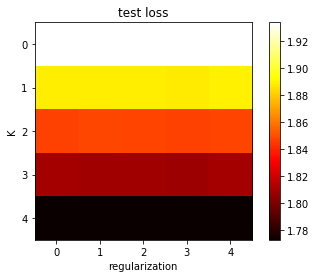

In [17]:
# plot loss as a heatmap based on combinations of K and regularization parameters to represent loss across all parameters

plt.imshow(np.sqrt(losses[:,3]).reshape(len(K_set),len(regular_set)), cmap='hot')
plt.colorbar()
plt.xlabel("regularization")
plt.ylabel("K")
plt.title("test loss")

plt.show()

Based on this heatmap representation and also two previous plots, just changing K results in lower loss, and regularization parameters values actually do not change the loss significantly. Best loss is for test set 3.1436777164351484 with K equals 10.0 and regularization equals 1.0 in my case, but other K values in this range are also accepted based on heatmap. 

## 3. Neural networks (programming exercise)

In [7]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [8]:
# Flag to ask if we want training or not

TRAINING = 1
TRAINING_SHUFFLE = 1

In [9]:
# Copy pasting the pythorch example

# Downloading CIFAR10

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# Function for showing the image to learn
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    


Files already downloaded and verified
Files already downloaded and verified


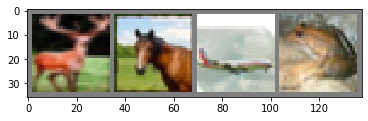

 deer horse plane  frog


In [10]:
# get some random training images

batch_size = 4

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


Starting to train a CNN Model
[1,  2000] loss: 2.210
[1,  4000] loss: 1.881
[1,  6000] loss: 1.706
[1,  8000] loss: 1.607
[1, 10000] loss: 1.530
[1, 12000] loss: 1.464
[2,  2000] loss: 1.400
[2,  4000] loss: 1.383
[2,  6000] loss: 1.332
[2,  8000] loss: 1.351
[2, 10000] loss: 1.300
[2, 12000] loss: 1.299
Finished Training CNN


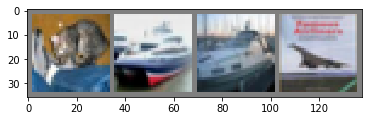

GroundTruth CNN:    cat  ship  ship plane
Predicted CNN:    cat   car   car   car


In [11]:
# Convolutional Neural Network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cnn = CNN()
PATH_CNN = './cifar_cnn.pth'

if TRAINING:
    # Loss funcstion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

    print("Starting to train a CNN Model")
    # Training the network
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training CNN')
    # Save the trained model
    torch.save(cnn.state_dict(), PATH_CNN)

# If we dont train we load the model
else:
    print("Loading a trained model CNN")
    cnn.load_state_dict(torch.load(PATH_CNN))


# Testing the trained model
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth CNN: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = cnn(images)

# Prediction
_, predicted = torch.max(outputs, 1)

print('Predicted CNN: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


In [15]:
### Counting the correct predictions
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the CNN-network on the 10000 test images: %d %%' % (
    100 * correct / total))

# Counting the classes that work correctly
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = cnn(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

accuracy_cnn = []
for i in range(10):
    accuracy_cnn.append(100 * class_correct[i] / class_total[i])
    print('Accuracy of %5s : %2d %%' % (
        classes[i], accuracy_cnn[i]))

Accuracy of the CNN-network on the 10000 test images: 54 %
Accuracy of plane : 76 %
Accuracy of   car : 66 %
Accuracy of  bird : 32 %
Accuracy of   cat : 37 %
Accuracy of  deer : 39 %
Accuracy of   dog : 51 %
Accuracy of  frog : 70 %
Accuracy of horse : 59 %
Accuracy of  ship : 53 %
Accuracy of truck : 59 %


In [16]:
# Exercise 3.a   

total_params_cnn = sum(p.numel() for p in cnn.parameters())
total_params_trainable_cnn = sum(p.numel() for p in cnn.parameters())

# Counting the parameters of the cnn model
print('Total parameters CNN: ', total_params_cnn)
print('Total Trainable parameters CNN: ', total_params_trainable_cnn)

Total parameters CNN:  62006
Total Trainable parameters CNN:  62006


Starting to train a MLP Model
[1,  2000] loss: 1.922
[1,  4000] loss: 1.723
[1,  6000] loss: 1.680
[1,  8000] loss: 1.612
[1, 10000] loss: 1.599
[1, 12000] loss: 1.554
[2,  2000] loss: 1.500
[2,  4000] loss: 1.500
[2,  6000] loss: 1.451
[2,  8000] loss: 1.465
[2, 10000] loss: 1.435
[2, 12000] loss: 1.458
Finished Training MLP


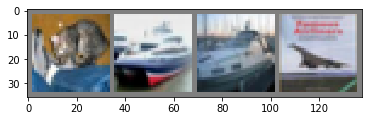

GroundTruth MLP:    cat  ship  ship plane
Predicted MLP:    cat  ship  ship  ship
Accuracy of the MLP-network on the 10000 test images: 49 %
Accuracy of plane : 56 %
Accuracy of   car : 69 %
Accuracy of  bird : 37 %
Accuracy of   cat : 48 %
Accuracy of  deer : 41 %
Accuracy of   dog : 20 %
Accuracy of  frog : 53 %
Accuracy of horse : 51 %
Accuracy of  ship : 62 %
Accuracy of truck : 48 %


In [17]:
# Exercise 3.b

# Define the MLP Neural Network
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


mlp = MLP()
PATH_MLP = './cifar_mlp.pth'

if TRAINING:
    # Loss funcstion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

    print("Starting to train a MLP Model")
    # Training the network
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = mlp(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training MLP')
    # Save the trained model
    torch.save(mlp.state_dict(), PATH_MLP)

# If we dont train we load the model
else:
    print("Loading a MLP trained model")
    mlp.load_state_dict(torch.load(PATH_MLP))


# Testing the trained model
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth MLP: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = mlp(images)

# Prediction
_, predicted = torch.max(outputs, 1)

print('Predicted MLP: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


# Counting the correct predictions
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = mlp(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the MLP-network on the 10000 test images: %d %%' % (
    100 * correct / total))

# Counting the classes that work correctly
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = mlp(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

accuracy_mlp = []
for i in range(10):
    accuracy_mlp.append(100 * class_correct[i] / class_total[i])
    print('Accuracy of %5s : %2d %%' % (
        classes[i], accuracy_mlp[i]))


# Counting the parameters of the MLP model
total_params_mlp = sum(p.numel() for p in mlp.parameters())
total_params_trainable_mlp = sum(p.numel() for p in mlp.parameters())


Total parameters for MLP:  402250
Total Trainable parameters for MLP:  402250


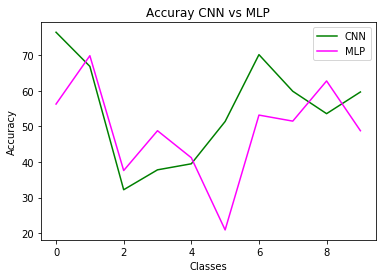

In [19]:
print('Total parameters for MLP: ', total_params_mlp)
print('Total Trainable parameters for MLP: ', total_params_trainable_mlp)

# Plot comparing both accuracies
x = range(10)
plt.plot(x, [accuracy_cnn[i] for i in x], c = 'green', label = 'CNN')
plt.plot(x, [accuracy_mlp[i] for i in x], c = 'magenta', label = 'MLP')
plt.title('Accuray CNN vs MLP')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [20]:
#Exercise 3.c   

# Shuffle the pixels
def shuffle(image):
    size = image.size()
    perm = torch.randperm(size[1] * size[2])
    for idx in range(size[0]):
        image[idx, :, :] =  image[idx, :, :].view(-1)[perm].view(size[1], size[2])
    return image


# Reload the pictures but shuffled
transform_shuffle = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Lambda(shuffle)])

trainset_shuffle = torchvision.datasets.CIFAR10(root='./data_shuffle', train=True,
                                        download=True, transform=transform_shuffle)
trainloader_shuffle = torch.utils.data.DataLoader(trainset_shuffle, batch_size=4,
                                          shuffle=True, num_workers=0)

testset_shuffle = torchvision.datasets.CIFAR10(root='./data_shuffle', train=False,
                                       download=True, transform=transform_shuffle)
testloader_shuffle = torch.utils.data.DataLoader(testset_shuffle, batch_size=4,
                                         shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [21]:
# Retrain CNN but shuffled

cnn_shuffle = CNN()
PATH_CNN_SHUFFLE = './cifar_cnn_shuffle.pth'

if TRAINING_SHUFFLE:
    # Loss funcstion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(cnn_shuffle.parameters(), lr=0.001, momentum=0.9)

    print("Starting to train a CNN SHUFFLE Model")
    # Training the network
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = cnn_shuffle(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training CNN SHUFFLE')
    # Save the trained model
    torch.save(cnn_shuffle.state_dict(), PATH_CNN_SHUFFLE)

    
# If we dont train we load the model
else:
    print("Loading a trained model CNN SHUFFLE")
    cnn_shuffle.load_state_dict(torch.load(PATH_CNN_SHUFFLE))

Starting to train a CNN SHUFFLE Model
[1,  2000] loss: 2.127
[1,  4000] loss: 1.794
[1,  6000] loss: 1.624
[1,  8000] loss: 1.562
[1, 10000] loss: 1.495
[1, 12000] loss: 1.479
[2,  2000] loss: 1.366
[2,  4000] loss: 1.380
[2,  6000] loss: 1.362
[2,  8000] loss: 1.325
[2, 10000] loss: 1.292
[2, 12000] loss: 1.268
Finished Training CNN SHUFFLE


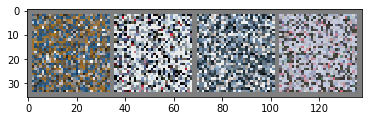

GroundTruth CNN SHUFFLE:    cat  ship  ship plane
Predicted CNN SHUFFLE:   frog truck   car   car
Accuracy of the CNN-network on the 10000 test images: 19 %


In [22]:
# Testing the trained model
dataiter = iter(testloader_shuffle)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth CNN SHUFFLE: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = cnn_shuffle(images)

# Prediction
_, predicted = torch.max(outputs, 1)

print('Predicted CNN SHUFFLE: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


# Counting the correct predictions
correct = 0
total = 0
with torch.no_grad():
    for data in testloader_shuffle:
        images, labels = data
        outputs = cnn_shuffle(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the CNN-network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [23]:
# Counting the classes that work correctly
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader_shuffle:
        images, labels = data
        outputs = cnn_shuffle(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

accuracy_cnn_shuffle = []
for i in range(10):
    accuracy_cnn_shuffle.append(100 * class_correct[i] / class_total[i])
    print('Accuracy of %5s : %2d %%' % (
        classes[i], accuracy_cnn_shuffle[i]))


# Counting the parameters of the cnn_shuffle model
total_params_cnn_shuffle = sum(p.numel() for p in cnn_shuffle.parameters())
total_params_trainable_cnn_shuffle = sum(p.numel() for p in cnn_shuffle.parameters())

print('Total parameters cnn_shuffle: ', total_params_cnn_shuffle)
print('Total Trainable parameters cnn_shuffle: ', total_params_trainable_cnn_shuffle)

Accuracy of plane : 14 %
Accuracy of   car : 56 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer : 13 %
Accuracy of   dog :  0 %
Accuracy of  frog : 70 %
Accuracy of horse :  0 %
Accuracy of  ship : 12 %
Accuracy of truck : 22 %
Total parameters cnn_shuffle:  62006
Total Trainable parameters cnn_shuffle:  62006


In [25]:
# Retrain MLP but shuffled
mlp_shuffle = MLP()
PATH_MLP_SHUFFLE = './cifar_mlp_shuffle.pth'

if TRAINING_SHUFFLE:
    # Loss funcstion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(mlp_shuffle.parameters(), lr=0.001, momentum=0.9)

    print("Starting to train a MLP_SHUFFLE Model")
    # Training the network
    for epoch in range(2):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = mlp_shuffle(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training MLP_SHUFFLE')
    # Save the trained model
    torch.save(mlp_shuffle.state_dict(), PATH_MLP_SHUFFLE)
    
    # If we dont train we load the model
else:
    print("Loading a MLP_SHUFFLE trained model")
    mlp_shuffle.load_state_dict(torch.load(PATH_MLP_SHUFFLE))

Starting to train a MLP_SHUFFLE Model
[1,  2000] loss: 1.918
[1,  4000] loss: 1.724
[1,  6000] loss: 1.658
[1,  8000] loss: 1.624
[1, 10000] loss: 1.597
[1, 12000] loss: 1.553
[2,  2000] loss: 1.494
[2,  4000] loss: 1.481
[2,  6000] loss: 1.473
[2,  8000] loss: 1.458
[2, 10000] loss: 1.469
[2, 12000] loss: 1.429
Finished Training MLP_SHUFFLE


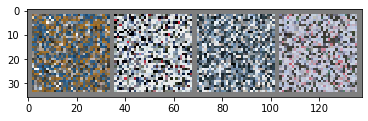

GroundTruth MLP SHUFFLE:    cat  ship  ship plane
Predicted MLP SHUFFLE:   bird plane plane plane
Accuracy of the MLP SHUFFLE-network on the 10000 test images: 18 %


In [26]:
# Testing the trained model
dataiter = iter(testloader_shuffle)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth MLP SHUFFLE: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = mlp_shuffle(images)

# Prediction
_, predicted = torch.max(outputs, 1)

print('Predicted MLP SHUFFLE: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


# Counting the correct predictions
correct = 0
total = 0
with torch.no_grad():
    for data in testloader_shuffle:
        images, labels = data
        outputs = mlp_shuffle(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the MLP SHUFFLE-network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [27]:
# Counting the classes that work correctly
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader_shuffle:
        images, labels = data
        outputs = mlp_shuffle(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

accuracy_mlp_shuffle = []
for i in range(10):
    accuracy_mlp_shuffle.append(100 * class_correct[i] / class_total[i])
    print('Accuracy of %5s : %2d %%' % (
        classes[i], accuracy_mlp_shuffle[i]))


# Counting the parameters of the MLP model
total_params_mlp_shuffle = sum(p.numel() for p in mlp_shuffle.parameters())
total_params_trainable_mlp_shuffle = sum(p.numel() for p in mlp_shuffle.parameters())

print('Total parameters for MLP SHUFFLE: ', total_params_mlp_shuffle)
print('Total Trainable parameters for MLP SHUFFLE: ', total_params_trainable_mlp_shuffle)



Accuracy of plane : 53 %
Accuracy of   car :  0 %
Accuracy of  bird : 20 %
Accuracy of   cat :  5 %
Accuracy of  deer : 19 %
Accuracy of   dog :  7 %
Accuracy of  frog : 63 %
Accuracy of horse :  0 %
Accuracy of  ship : 10 %
Accuracy of truck :  0 %
Total parameters for MLP SHUFFLE:  402250
Total Trainable parameters for MLP SHUFFLE:  402250


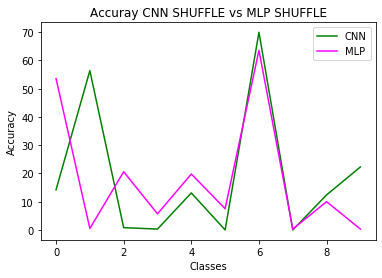

In [28]:
# Plot comparing both accuracies
x = range(10)
plt.plot(x, [accuracy_cnn_shuffle[i] for i in x], c = 'green', label = 'CNN')
plt.plot(x, [accuracy_mlp_shuffle[i] for i in x], c = 'magenta', label = 'MLP')
plt.title('Accuray CNN SHUFFLE vs MLP SHUFFLE')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

It shows that the stronger the randomization is the lower the accuracy of the network would be. Applying the same permutation to all examples the local patterns that repeat within the same image are destroyed. The convolutional network has a built-in infinitely strong prior which constrains the values of some parameters to zero making it highly sensitive to the spatial structure of the data. The more the local pixel correlation is removed the lower the classification accuracy becomes. (see Convolutional Neural Networks on Randomized Data, Cristian IvanRomanian Institute of Science and Technology.Romania). Natural images are structures where local correlations are important. This is the reason why edges, corners, etc. are learned by the CNN’s first few layers when trained on natural images. Combining these basic building blocks in complex hierarchical structures results in large varieties of images and objects. So, thats the reason that after shuffling we are getting low accuracies in most of the classes. At a more pro-found level it is speculated that this is the reason why deep learning works so well in practice. If pixels are moved in random positions across the image domain their initial local correlation is destroyed and it becomes a long range correlation